<p style="background-color:#3ab1c8;font-family:Cursive;font-size:200%;color:black;text-align:center;border-radius:120px 20px;padding:20px;margin:20px;"><b>Unsupervised Learning - Dec 23</b></p>

<p style="font-family:Cursive;font-size:100%;color:black;text-align:center;border-radius:10px 10px;"><b>by Nash</b></p>

<b style="font-family:Cursive;font-size:100%;color:black;text-align:right;border-radius:10px 10px;">Follow me [Linkedin](www.linkedin.com/in/nash-n-sungur-333869289) | [Git Hub](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0)</b>

- Sonuclar **ANLMALIMI** ve **KULLANISLI** mi olduguna göre degerlendirilir
- En cok kullanilanlari ögrenecegiz
- KMeans, hierarchical (Dendrogram), PCA
- Clustering cok önemli
- Unlabeled Data ile calisilir (target variable yok)
- X kümesindeki müsteriler diger gruba göre daha yakindir.

Paternleri yakalar

Kümeleme de domain knowladge cok önemlidir. Tecrübeye dayali kümeleme matematiki sonuctan daha önemlidir.

unsupervised da sonuclar tartismaya aciktir

# K-Means Clustering

K-Means Intro

Costumer secmentation larda kullanilir (Clustering). Müsterileri, benzer özelliklere göre ayirip, farkli gruplara ayirip reklam indirim gibi strateji gelistirmek icin kullanilir.

- KMeans Populer ve güclü bir algoritma.
- KMeans distance based oldugu icin scale yapmak gerekir


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#%matplotlib notebook

from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


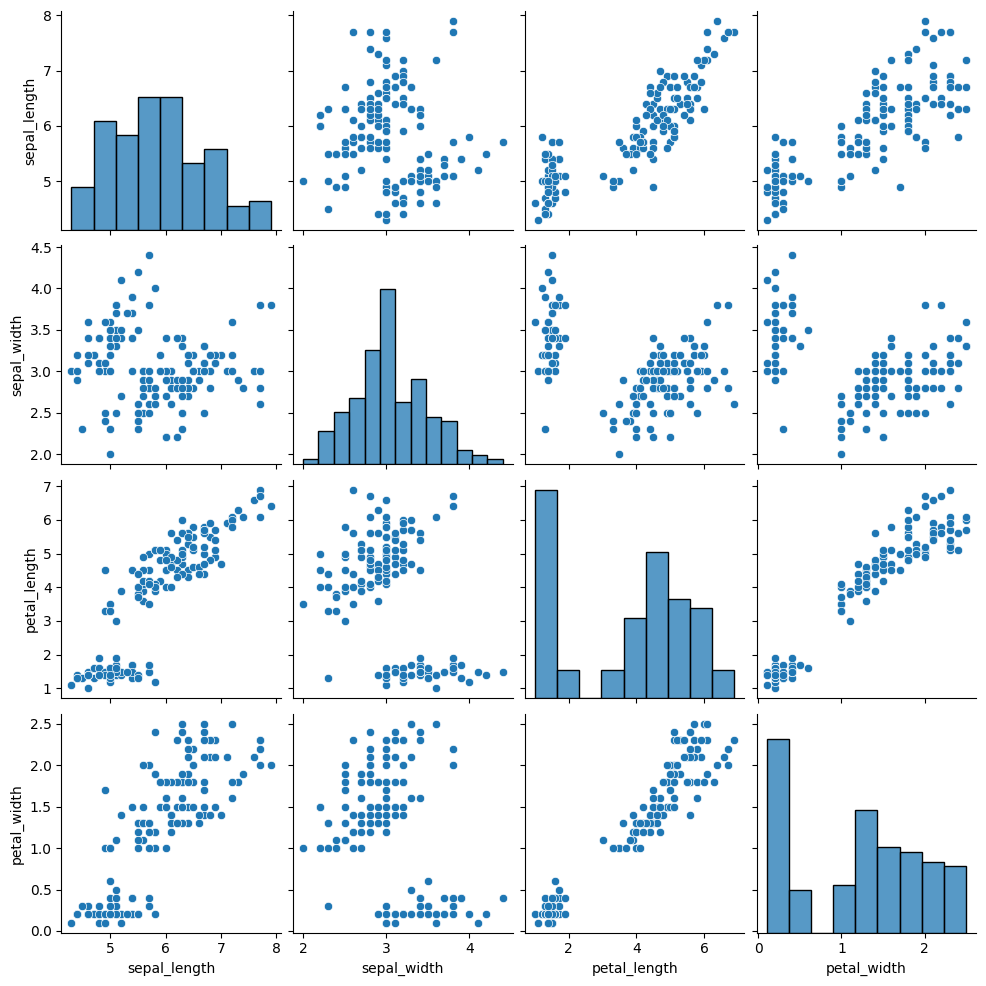

In [6]:
sns.pairplot(df)
plt.show()

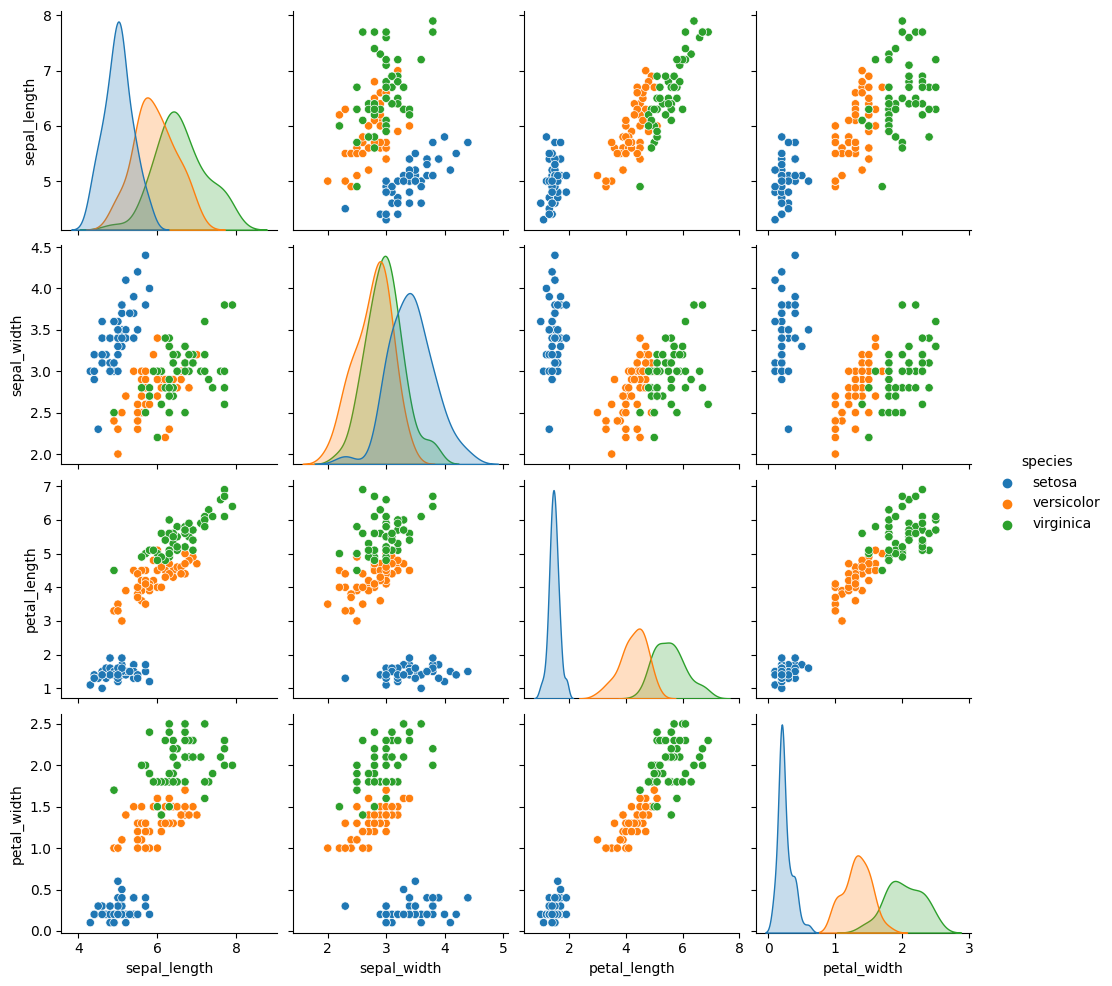

In [7]:
sns.pairplot(data=df, hue="species")
plt.show()

# Data  Scaling 

KMeans algoritmasinda mutlaka scale gerekir.

In [8]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# iris_scaled = scaler.fit_transform(df)

# K_Means Clustering

KMeans islem siralamasi
- Hopkins Testi (data kümelemeye uygun olup olmadigi test edilir). Test sonucu 0 ile 0.5 arasi ise kümelenebilir oldugu, 0.5 ile 1 arasi ise kümelemeye uygun olmadigi anlasilir
- Optimum cluster sayisini bulmak. Bunun icin önce Domain knowledge yoksa Elbow veya Silhouette kullanilir
- Cluster isleminin kalite kontrolu (ARI-Rand Index)

In [9]:
Z = df.copy()

In [10]:
Z

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
X = Z.drop("species", axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
X.shape

(150, 4)

In [13]:
Z2 = df.drop("species", axis=1)
Z2

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
Z2.shape

(150, 4)

In [15]:
scaler = StandardScaler()

Z2_scaled = scaler.fit_transform(Z2)

In [16]:
X2 = pd.DataFrame(Z2_scaled)
X2

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [17]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Modelling

In [18]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)

# n_cluster : küme sayisi

KMeans te fit ve presict genelde beraber kullanilir. Fit denildiginde patternleri yakalayip centroid leri olusturur, predickt deyince veri noktalarini kümelerine atama yapar.

In [19]:
K_means_model.fit_predict(X)   # burada hem fit hem predict bir arada. DAHA COK BU SEKILDE KULLANILIR

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [20]:
K_means_model.fit_predict(X2)

array([1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 4, 0, 4, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 4, 0, 4, 0, 4, 4, 3, 4, 0, 4,
       4, 0, 4, 0, 0, 4, 0, 4, 4, 3, 4, 0, 4, 0, 4, 4, 0, 0, 0, 4, 4, 4,
       0, 0, 0, 4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 0])

**fit ve predict i ayri ayri yapilmasi gerektiginde**

In [21]:
K_means_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [22]:
K_means_model.labels_  # predict kismi burda

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [23]:
X["Classes"] = K_means_model.labels_
X

,sepal_length,sepal_width,petal_length,petal_width,Classes
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,4


# Hopkins test

Bir veri setinin kümelenmeye ytkinligini ölcemk icin kullanilan istatistik testidir.

- 0.5 in alti kabul edilebilir ama 0.3 un alti istenen bir durumdur.
- 0.5 ten büyük ise kümelenme egilimi olmadigini söyleyebiliriz.

In [24]:
X = X.drop("Classes", axis =1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
from sklearn.neighbors import BallTree  # BallTree, veri noktaları arasındaki uzaklık sorgularını hızlı bir şekilde gerçekleştirmek için kullanılan bir veri yapısıdır. 
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [26]:
X.shape

(150, 4)

In [27]:
hopkins(X, X.shape[0])   # X.shape veri setinin tamamini kullanmis oluyoruz.
                        # büyük datalrda %10-20 gibi alinabilir.

0.18023348842432282

In [28]:
X2.shape

(150, 4)

In [29]:
hopkins(X2, X2.shape[0])

0.19051848246635947

In [30]:
# bir baska örnek
hopkins(X, 60)

0.17267241044868759

**Chat gpt den alternatifler**

# Choosing The Optimal Number of Clusters

Eger Domain knowladge yoksa matemetik bize yardimci olacak

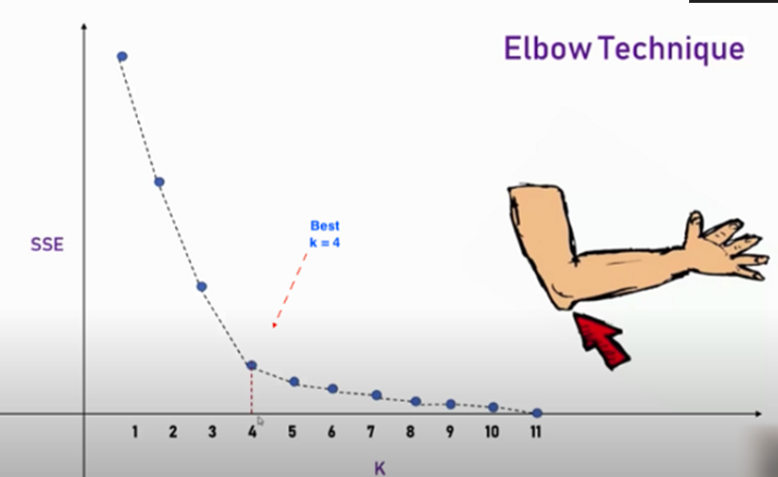

In [31]:
ssd = []  # inertia ..SSD, "Sum of Squared Distances"

K = range(2, 10) # minimum 2 küme ile basladik

for k in K:          # Her bir farklı küme sayısı için K-Means modelini oluşturur ve eğitir.
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

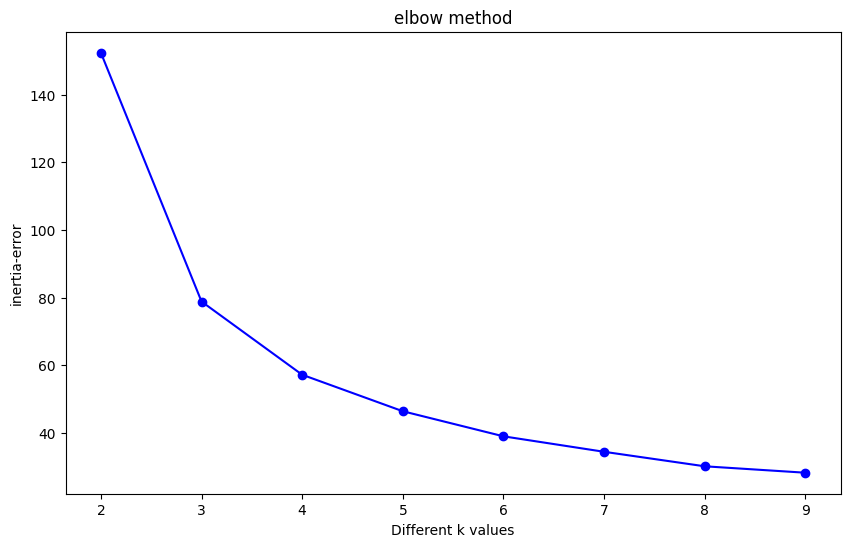

In [32]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")
plt.show()

In [33]:
ssd

[152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.44618205128206,
 39.03998724608725,
 34.469495898838005,
 30.186555194805198,
 28.289370851370855]

In [34]:
pd.Series(ssd).diff()

0          NaN
1   -73.496510
2   -21.622968
3   -10.782291
4    -7.406195
5    -4.570491
6    -4.282941
7    -1.897184
dtype: float64

In [35]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,73.496510
3,21.622968
4,10.782291
5,7.406195
6,4.570491
7,4.282941
8,1.897184


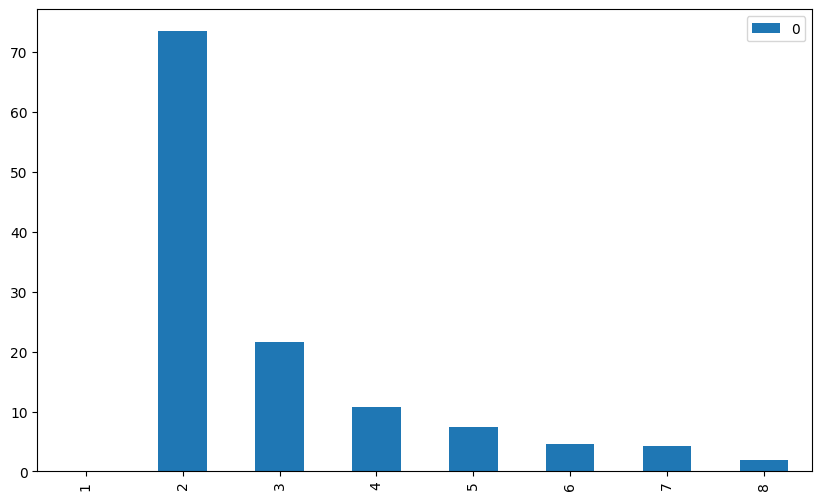

In [36]:
df_diff.plot(kind='bar');  # en sert düsüs 3 gibi, burdan daha iyi fark ediliyor gibi

grafiklere göre en sert düsüs veya kirilma k=3 gibi görünüyor..

# Second Method - Yellowbrick (n_cluster selection)

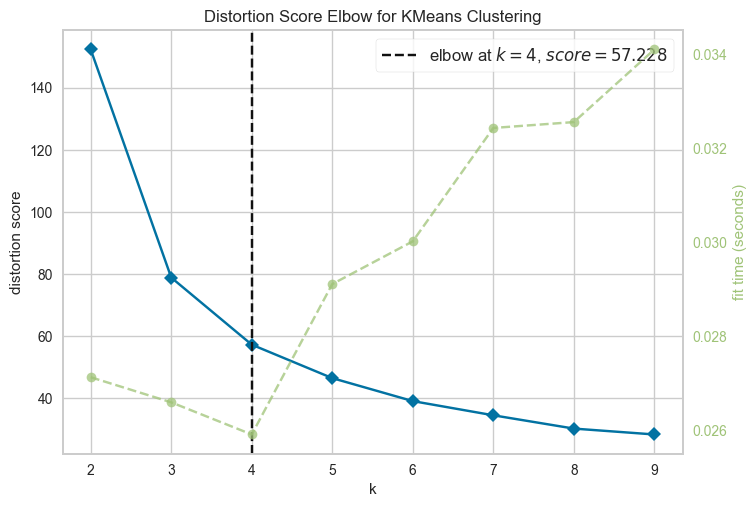

In [37]:
from yellowbrick.cluster import KElbowVisualizer   # yellowbrick ile elbow daki grafikte seçim yapar
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) # algoritmanın 2 ile 10 arasındaki her küme sayısı için modeli değerlendireceği anlamına gelir.
visualizer.fit(X)        # Fit the data to the visualizer.. inertia metoduna ggöre gösterir
visualizer.show();

yellowbrick e göre k=4 görünüyor.

# Silhouette analysis

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_score(X, K_means_model.labels_)

0.48874888709310654

In [40]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
    
# silhouette score un 0.5 ten yüksek olmasi makbuldur

For n_clusters=2, the silhouette score is 0.6810461692117465
For n_clusters=3, the silhouette score is 0.5528190123564102
For n_clusters=4, the silhouette score is 0.49805050499728815
For n_clusters=5, the silhouette score is 0.48874888709310654
For n_clusters=6, the silhouette score is 0.36483400396700366
For n_clusters=7, the silhouette score is 0.34974816211612186
For n_clusters=8, the silhouette score is 0.3574536925852728


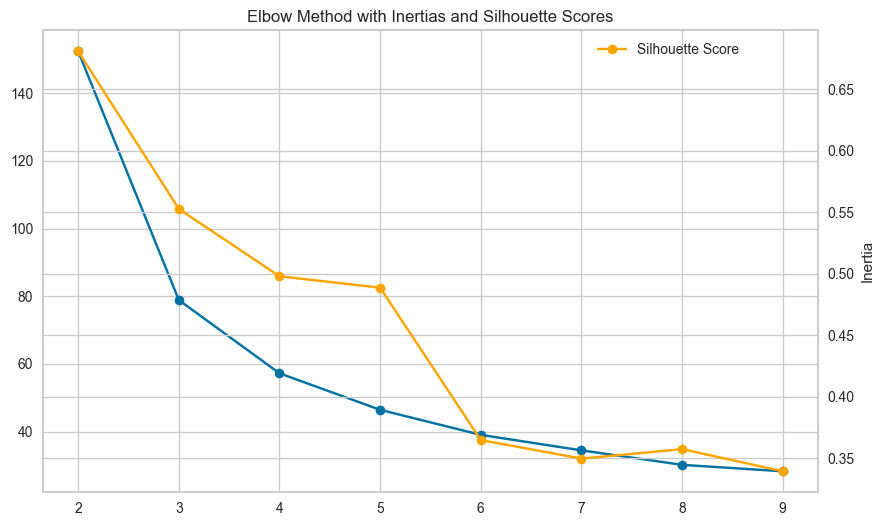

In [41]:
# Elbow ve Silhouette scorunu birlikte gösteren grafik

inertia_scores = []
silhouette_scores = []

for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X)
    
    silhouette = silhouette_score(X, labels)
    inertia = model.inertia_
    
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)

# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))

# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')

# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')

# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))

plt.show()

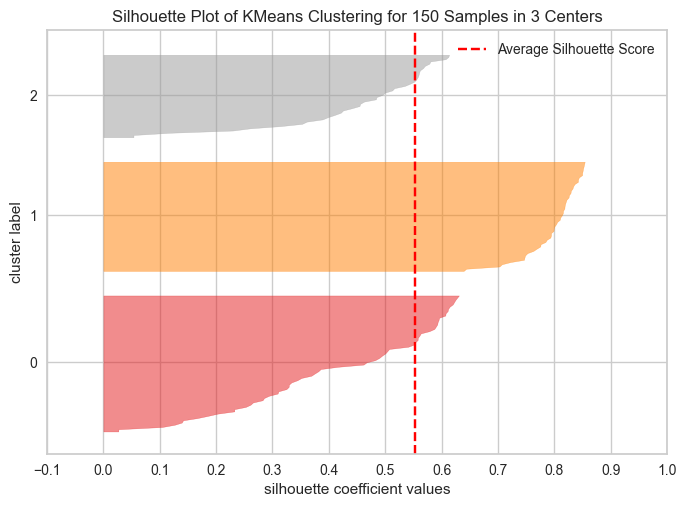

In [42]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
model3 = KMeans(n_clusters=3, random_state=42)  # kmeans = 3 olarak seçtik ve ona göre çizim yaptı
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

n_cluster icin 2,3,4,5 in grafiklerini kiyaslayinca en uygunun 3 olduguna kanaat getirdik. silhouette score yuksek - inertia dusuk olmali

# Building the model based on the optimal number of clusters

In [43]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [44]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [45]:
model.labels_    # n_cluster = 3 icin predict sonuclari

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [46]:
clusters = model.labels_

In [47]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
X["predicted_clusters"] = clusters
X.head()      # burada predict olan class lari görüyoruz

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [49]:
df["predicted_clusters"] = clusters
df

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [50]:
df.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
72,6.3,2.5,4.9,1.5,versicolor,2
67,5.8,2.7,4.1,1.0,versicolor,2
86,6.7,3.1,4.7,1.5,versicolor,0
94,5.6,2.7,4.2,1.3,versicolor,2
1,4.9,3.0,1.4,0.2,setosa,1
28,5.2,3.4,1.4,0.2,setosa,1
88,5.6,3.0,4.1,1.3,versicolor,2
0,5.1,3.5,1.4,0.2,setosa,1
57,4.9,2.4,3.3,1.0,versicolor,2
87,6.3,2.3,4.4,1.3,versicolor,2


## Crosstab ile (pandas dan) sonuclari karsilastiralim

In [51]:
ct = pd.crosstab(df.predicted_clusters, df.species) # ayrılan klaslara göre tahmin ve labels karşılaştırıyor.
ct

# bu data scaled oldugu icin sonuclar hocanin ki ile farkli!!!!!!

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,11,36
1,50,0,0
2,0,39,14


0 ile 2 nin silhouette score dusuk olmasinn sebebi, bu iki grupo birbirine girmis ve iki grup tam ayrilamamis

# Addjust Rand Score

In [52]:
from sklearn.metrics import adjusted_rand_score

In [53]:
df_end = df
df_end

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [54]:
# adjusted_rand_score(labels_treu, labels_pred)

adjusted_rand_score(df_end.species, df_end.predicted_clusters)

0.6201351808870379

bu skor 1'2 yakin oldugu icin ortalamanin üzerindedir

# Visualization Clusters

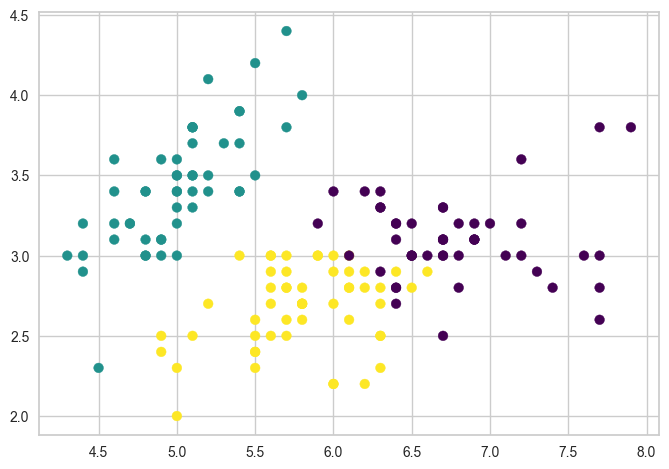

In [55]:
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis");

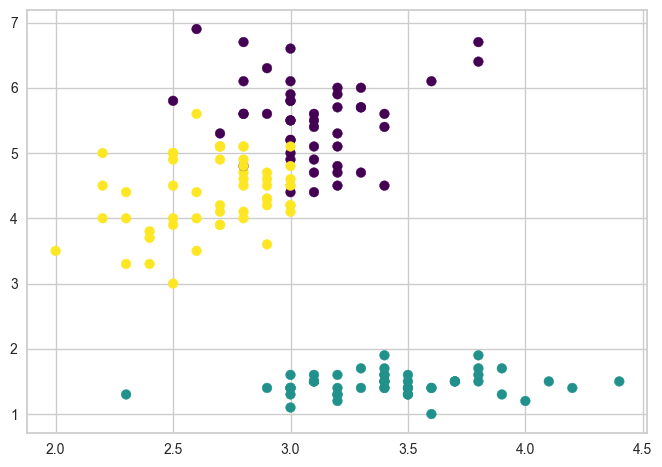

In [56]:
plt.scatter(X["sepal_width"], X["petal_length"], c = X.predicted_clusters, cmap = "viridis");
# usttekine gore x ve y yer değiştirildi

In [57]:
# her bir feature icin centroid koordinatlarini bulalim. Centroidlerin x, y koordinatlari

centers = model.cluster_centers_
centers

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [58]:
centers[:,0] # centers of sepal_length feature...

array([ 1.13597027, -1.01457897, -0.05021989])

In [59]:
centers[:,1] # centers of sepal_width feature

array([ 0.08842168,  0.85326268, -0.88337647])

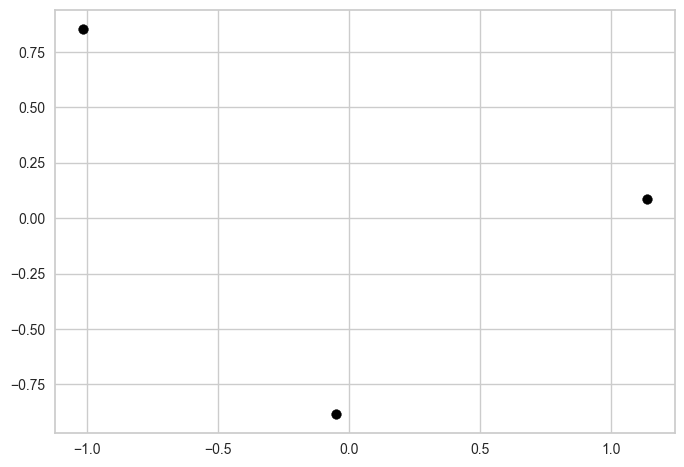

In [60]:
plt.scatter(centers[:,0], centers[:,1], c = "black");
# merkez noktalarını görelim çizimde

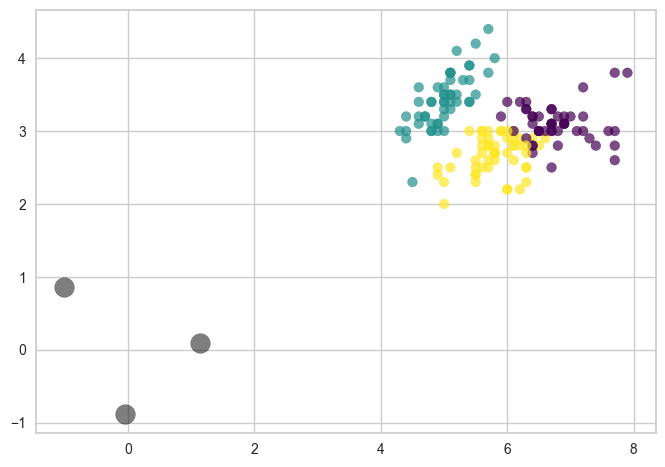

In [61]:
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [66]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [67]:
df.iloc[:, [0,1,2,3,5]].head()  # species i devre disi birakalim

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [68]:
clus_pred = df.iloc[:, [0,1,2,3,5]].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
sepal_length,6.780851,5.006,5.801887
sepal_width,3.095745,3.428,2.673585
petal_length,5.510638,1.462,4.369811
petal_width,1.972340,0.246,1.413208


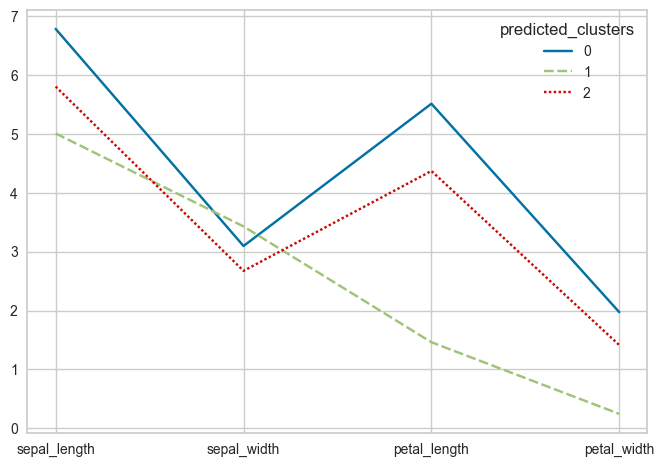

In [69]:
sns.lineplot(data = clus_pred);

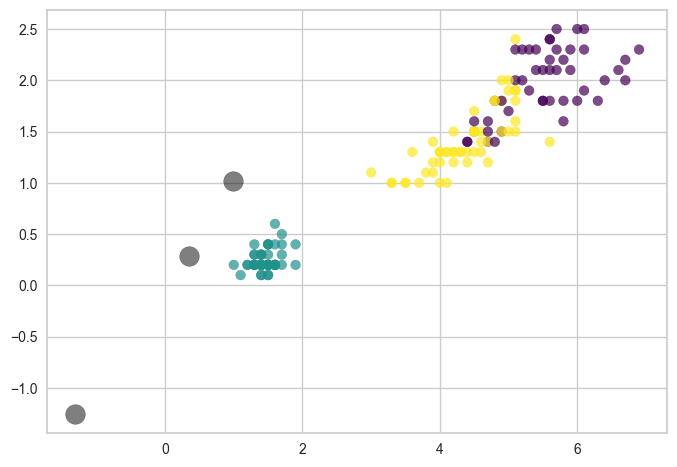

In [70]:
plt.scatter(X["petal_length"], X["petal_width"], c = X.predicted_clusters, cmap = "viridis", alpha =0.7)
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)

# New Model with two features

In [71]:
X2 = X.iloc[:, [2,3]]
X2

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


# Hopkins test

In [72]:
hopkins(X2, X2.shape[0])  # 0.102.. gibi daha iyi bir skor aldik

0.10223074691880031

## Elbow methodu

Text(0.5, 1.0, 'elbow method')

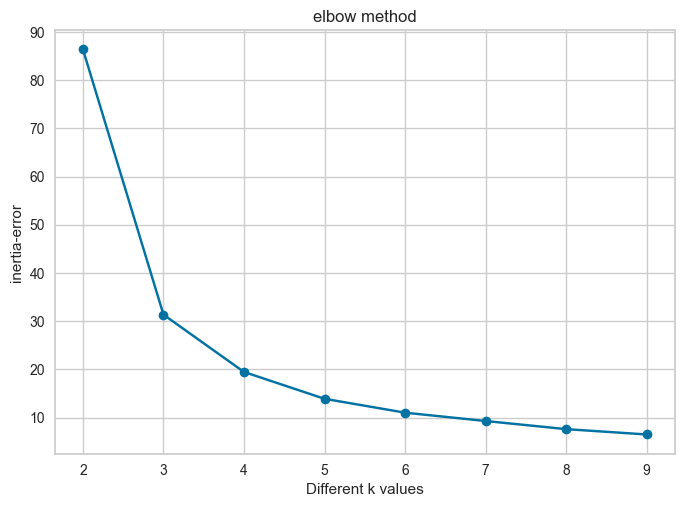

In [76]:
ssd = []
K = range(2,10)
for k in K:
    model3 = KMeans(n_clusters =k)
    model3.fit(X2)
    ssd.append(model3.inertia_)

plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [77]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,55.018861
3,11.888358
4,5.566092
5,2.880575
6,1.727732
7,1.687105
8,1.107264


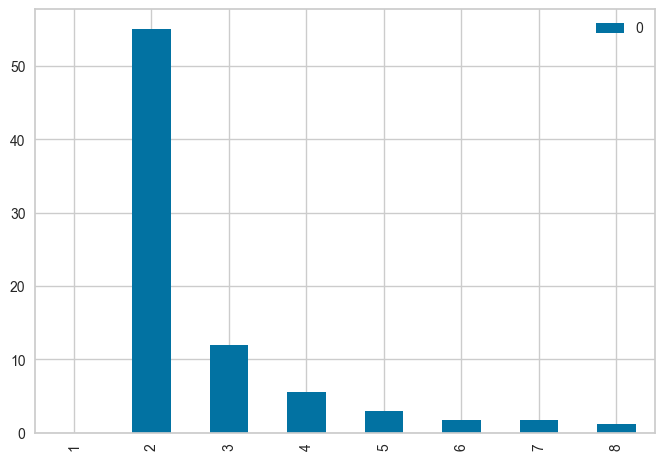

In [78]:
df_diff.plot(kind='bar');

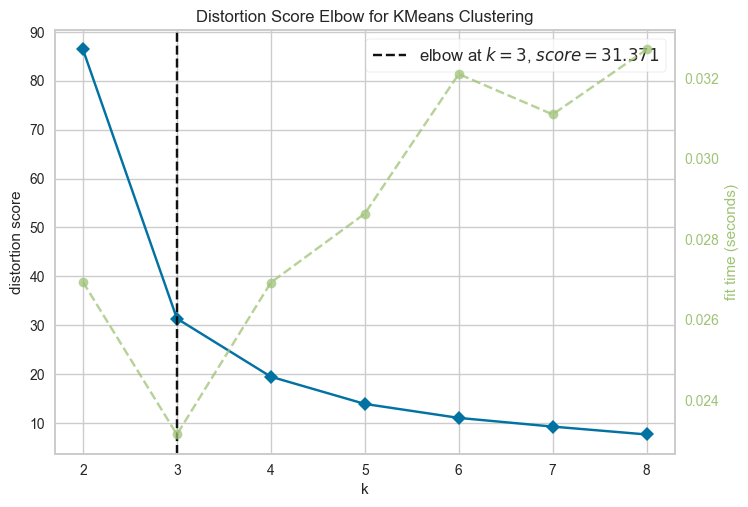

In [79]:
from yellowbrick.cluster import KElbowVisualizer
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))
visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

In [80]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.7653904101258123
For n_clusters=3, the silhouette score is 0.6604800083974887
For n_clusters=4, the silhouette score is 0.6127580794464402
For n_clusters=5, the silhouette score is 0.5883732712110276
For n_clusters=6, the silhouette score is 0.5767097832601947
For n_clusters=7, the silhouette score is 0.5640984340524553
For n_clusters=8, the silhouette score is 0.5902255624998716


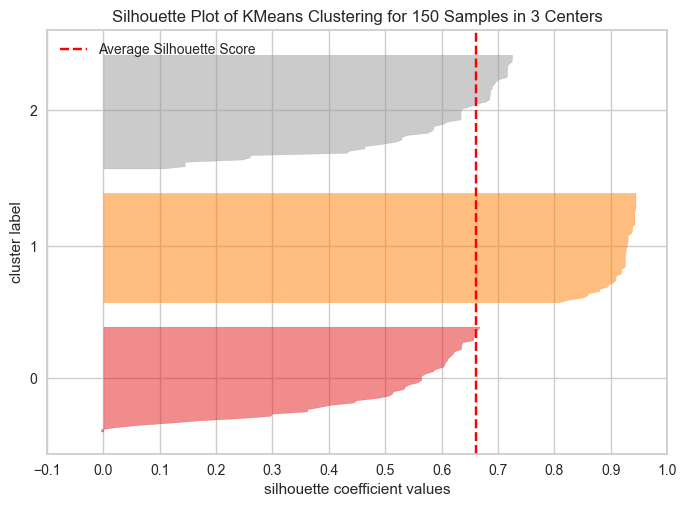

In [81]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

In [82]:
final_model = KMeans(n_clusters =3, random_state=42)
final_model.fit_predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [83]:
X2["species"] = df["species"]
X2

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


In [85]:
X2["predicted_clusters"] = final_model.labels_
X2

,petal_length,petal_width,species,predicted_clusters
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1
...,...,...,...,...
145,5.2,2.3,virginica,0
146,5.0,1.9,virginica,0
147,5.2,2.0,virginica,0
148,5.4,2.3,virginica,0


In [86]:
# Adjust Rand Score

adjusted_rand_score(X2.species, X2.predicted_clusters)  # 0.73 ten 0.88 oldu

0.8856970310281228

In [87]:
# Sonuclari karsilastiralim
# ct for 2 features

pd.crosstab(X2.predicted_clusters, X2.species)

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,2,46
1,50,0,0
2,0,48,4


# Prediction cluster of new data

In [88]:
new_data = [[1.7, 0.2]]

final_model.predict(new_data)

array([1])